# Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from scipy.spatial.distance import cdist

In [2]:
data1_names = pd.read_csv("Part1 - Car name.csv")
data1_attributes = pd.read_json(r"Part1 - Car-Attributes.json")
data1 = data1_names.join(data1_attributes)

In [3]:
print("Car names shape: {}".format(data1_names.shape))
print("Car names size: {}".format(data1_names.size))
print("Car attributes shape: {}".format(data1_attributes.shape))
print("Car attributes size: {}".format(data1_attributes.size))
print("Final Dataset shape: {}".format( data1.shape))
print( "Final Dataset size: {}".format(data1.size))

Car names shape: (398, 1)
Car names size: 398
Car attributes shape: (398, 8)
Car attributes size: 3184
Final Dataset shape: (398, 9)
Final Dataset size: 3582


In [4]:
data1.to_json("Car_dataset.json")
data1.to_csv("Car_dataset.csv")
data1.to_excel("Car_dataset.xlsx")

In [5]:
# data1.drop("car_name", axis = 'columns', inplace = True )
data1

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0    chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1            buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2           plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3                amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                  ford torino  17.0    8  302.0  140  3449  10.5  70       1
..                         ...   ...  ...    ...  ...   ...   ...  ..     ...
393            ford mustang gl  27.0    4  140.0   86  2790  15.6  82       1
394                  vw pickup  44.0    4   97.0   52  2130  24.6  82       2
395              dodge rampage  32.0    4  135.0   84  2295  11.6  82       1
396                ford ranger  28.0    4  120.0   79  2625  18.6  82       1
397                 chevy s-10  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 9 columns]

In [6]:
data1['hp'] = data1['hp'].replace('?', np.nan)

In [7]:
data1.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [8]:
data1["hp"].astype("float64")
data1['hp'].fillna(data1['hp'].mean(), inplace = True)
data1.drop("car_name", axis = "columns", inplace = True)

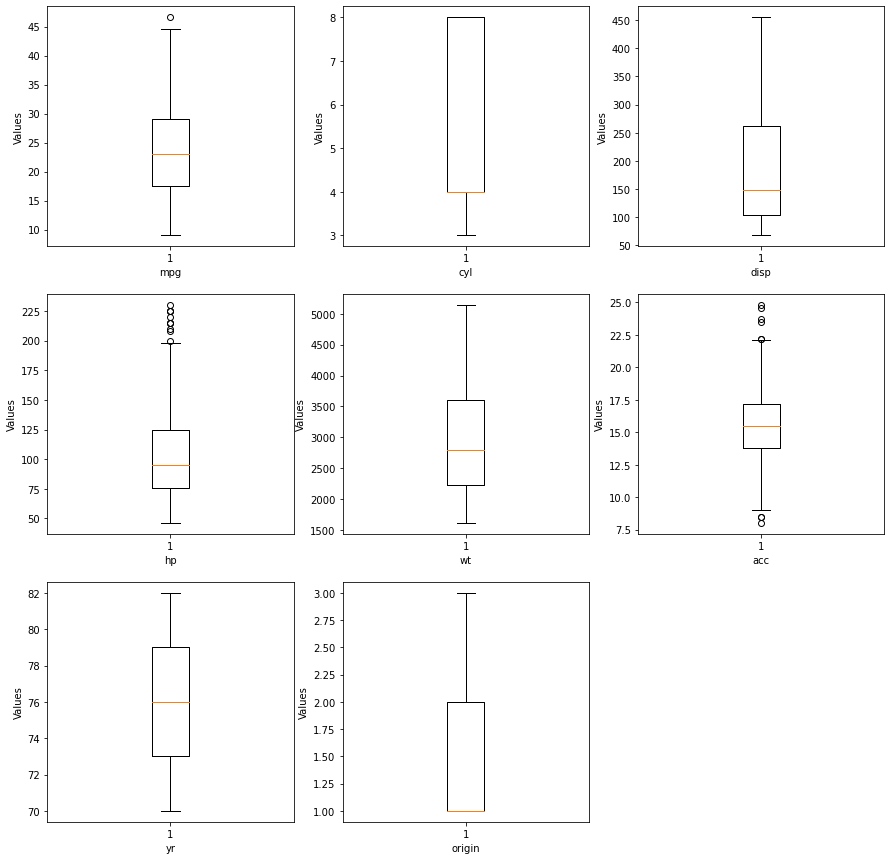

In [9]:
# Generically define how many plots along and across
ncols = 3
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Lazy counter so we can remove unwanted axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(data1.columns):

            ax.boxplot(x = data1[data1.columns[counter]])
            ax.set_xlabel(data1.columns[counter])
            ax.set_ylabel('Values')
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

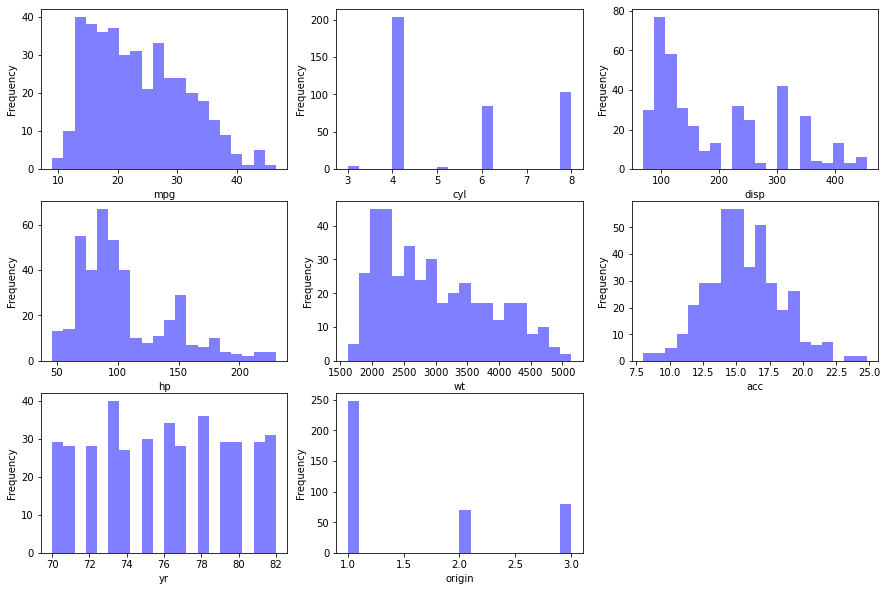

In [10]:
# Generically define how many plots along and across
ncols = 3
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Lazy counter so we can remove unwanted axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(data1.columns):

            ax.hist(data1[data1.columns[counter]], bins=20, color='blue', alpha=0.5,
            label='{}'.format(data1.columns[counter]))
            ax.set_xlabel(data1.columns[counter])
            ax.set_ylabel('Frequency')
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

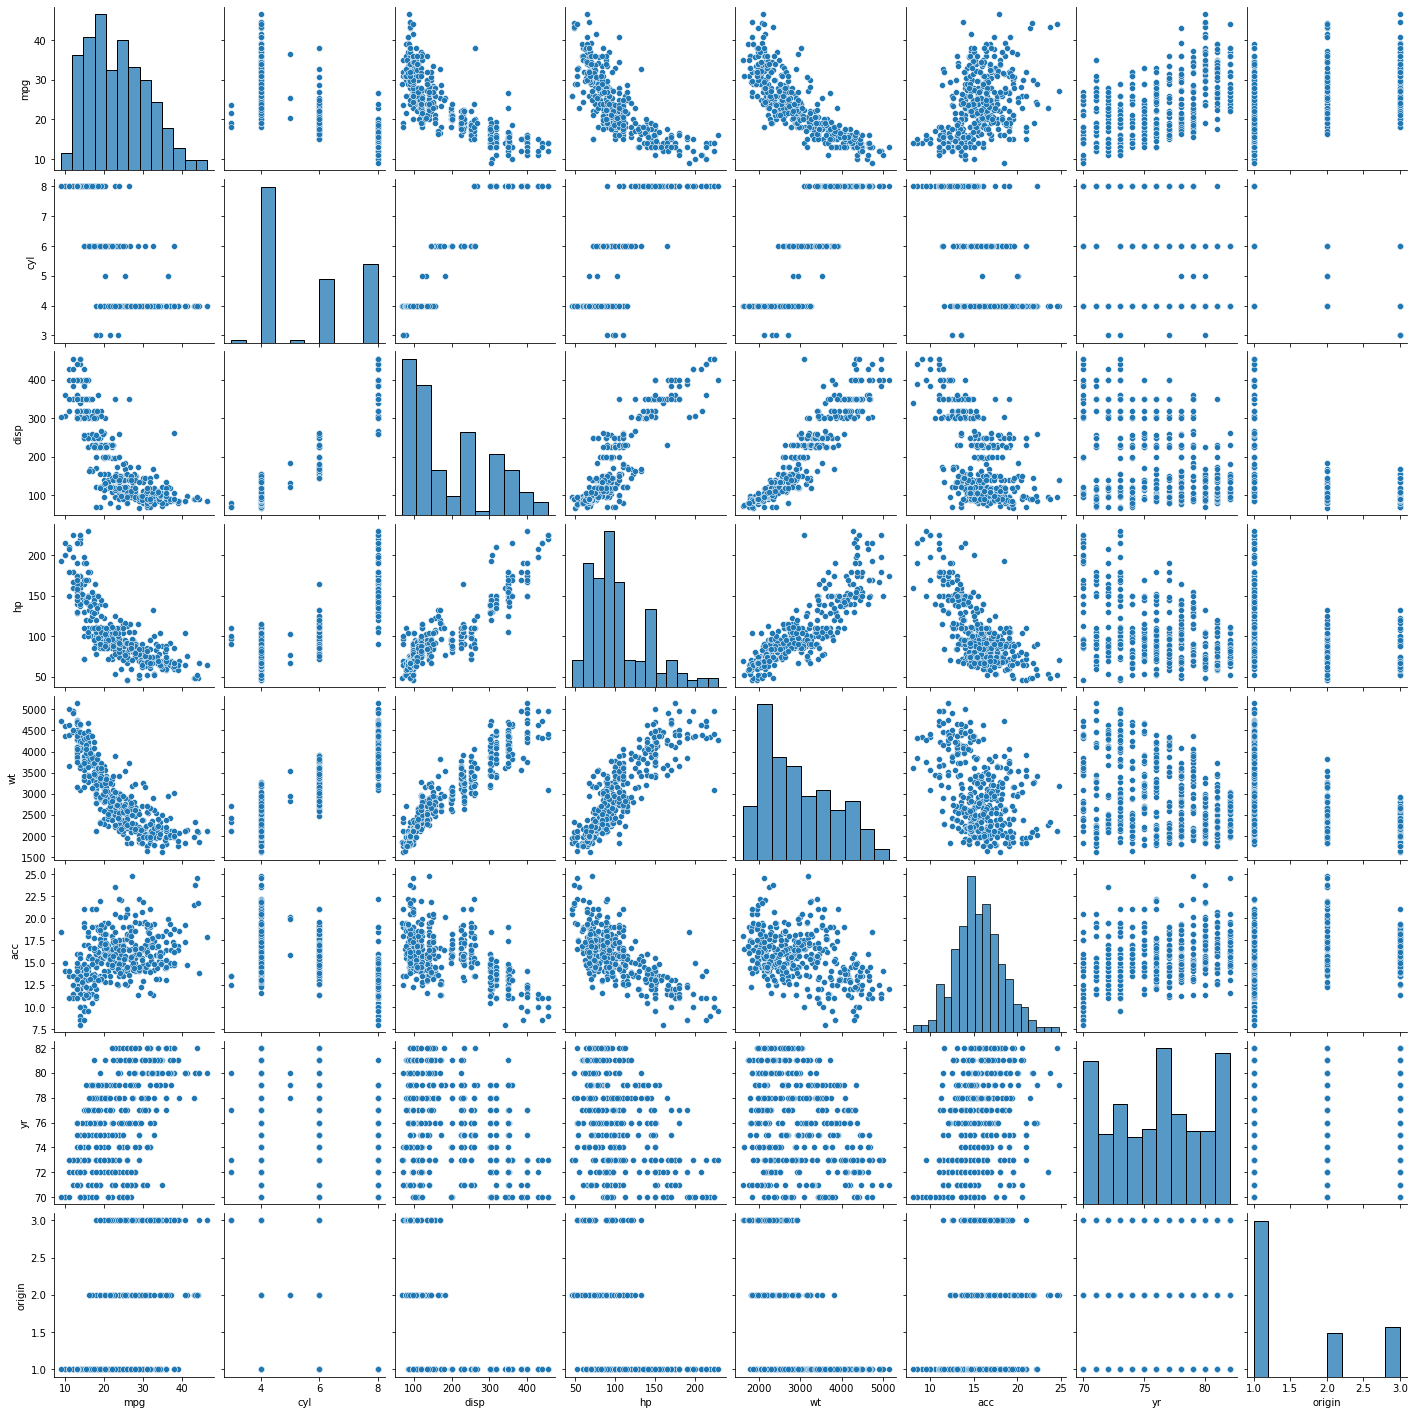

In [11]:
sns.pairplot(data1)

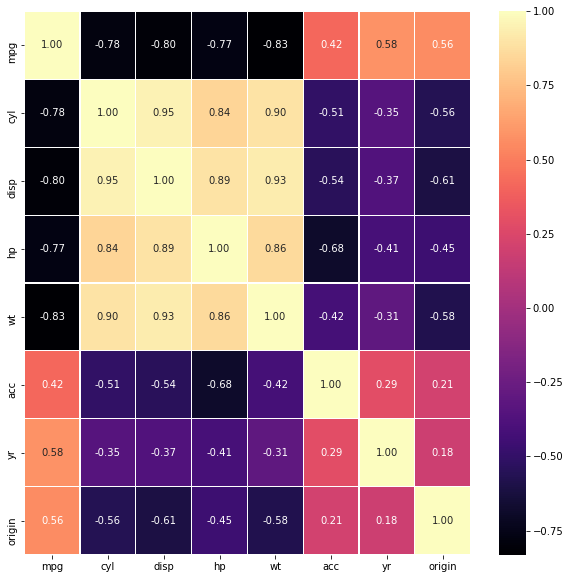

In [12]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data1.corr(), ax = ax, annot = True, linewidth = 0.05, fmt = '0.2f', cmap = 'magma') # color intensity
plt.show()

In [13]:
mean1 = data1.mean()
std1 = data1.std()
data10 = (data1 - mean1)/std1
data10.drop("yr", axis = "columns", inplace = True)

C:\Users\1000279427\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

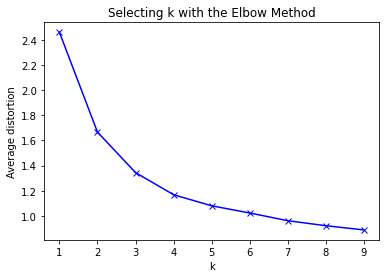

In [14]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data10)
    prediction=model.predict(data10)
    meanDistortions.append(sum(np.min(cdist(data10, model.cluster_centers_, 'euclidean'), axis=1)) / data10.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


The elbow in the given figure can be 2 or 5. Since the elbow at 2 is slightly sharper, we use 2. This could be the distinction between hatchback and non-hatchback types, since the body type and weight significantly differs between hatchback and other car types.  

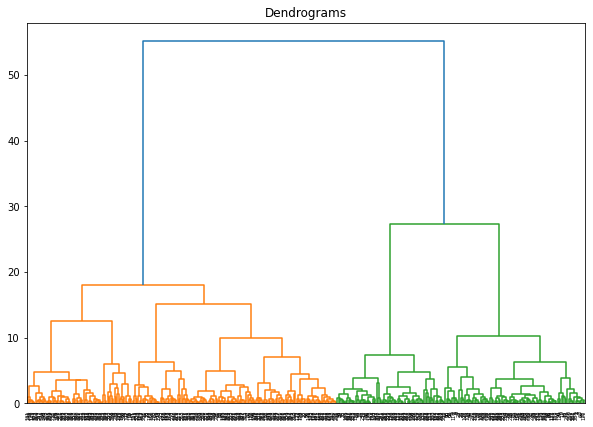

In [15]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data10, method='ward'))

We see that in hierarchical clustering the longest line is in the last merge. Thus, we draw the line cutting it around 30 and the number of clusters is 2.  

In [16]:
#Finding optimal no. of clusters

clusters=range(1,20)

model1=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model1.fit(data10)

AgglomerativeClustering(linkage='average')

Optimal clusters for each of the methods have been mentioned after the method.

K means clustering uses a centroid based clustering method where number of centroids have to be given to the function beforehand. Thus to get optimal clusters be need to use elbow method. Hierarchical clustering uses a dendrogram to obtain as many clusters as specified. The method of selecting optimal clusters is cutting the dendrogram at the longest line. Thus both these methods are vastly different.

the optimal clusters are thus 2 in bot K means and Hierarchical clustering methods. 

# Conclusion, part 1

In the above analysis we built K means clustering and hierarchical clustering models on the data. <br>
To provide a better analysis in the future:<br>
1. Data points about more cars could be collected <br>
2. Include more features, like  

# Part 2

In [17]:
data2 = pd.read_excel("Part2 - Company.xlsx")

In [18]:
data2_X = data2[data2['Quality'].notnull()]
X = data2_X.drop("Quality", axis = "columns")
y = data2_X["Quality"]
mean = X.mean()
std = X.std()
X = (X - mean)/std

In [19]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.model_selection as ms
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.15, stratify = y, random_state=3)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
scores = accuracy_score(y_test, y_pred)
print(scores)

1.0


the model knn will help in imputing the missing values of the data, owing to 100% accuracy in prediction

# Part 3

In [20]:
from sklearn.decomposition import PCA

In [21]:
data3 = pd.read_csv("Part3 - vehicle.csv")

In [22]:
data3 = data3.replace("",np.nan)

In [23]:
data3.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [24]:
data3 = data3.dropna(how = "any")

In [25]:
data3.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [26]:

data31 = data3.drop("class", axis = "columns")

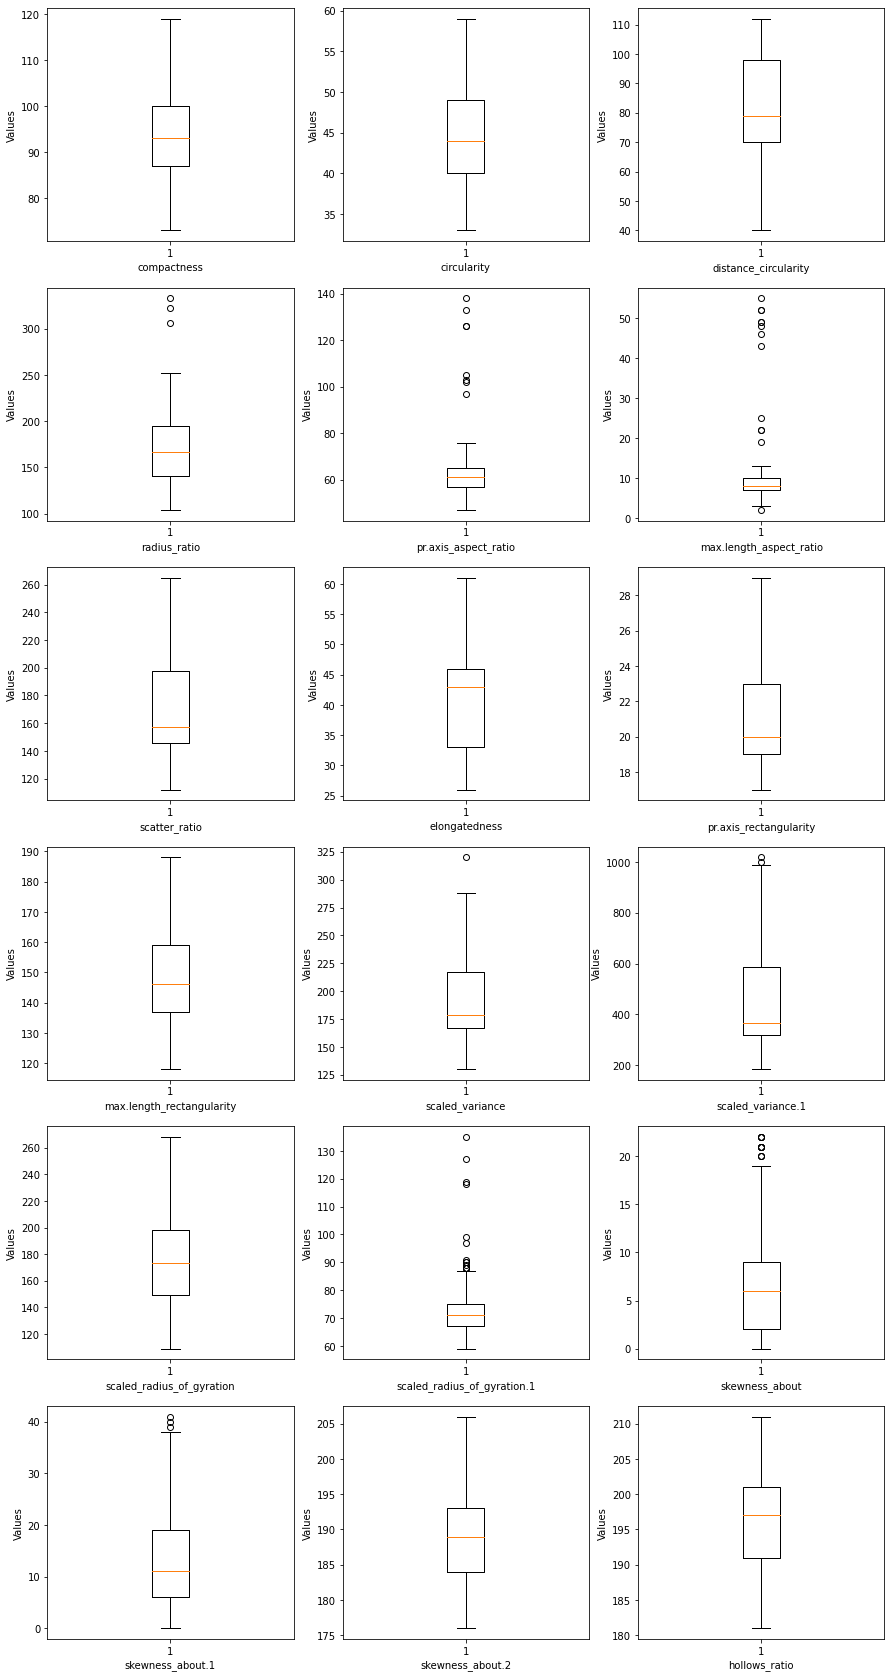

In [27]:
# Generically define how many plots along and across
ncols = 3
nrows = 6
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# Lazy counter so we can remove unwanted axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(data31.columns):

            ax.boxplot(x = data31[data31.columns[counter]])
            ax.set_xlabel(data31.columns[counter])
            ax.set_ylabel('Values')
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

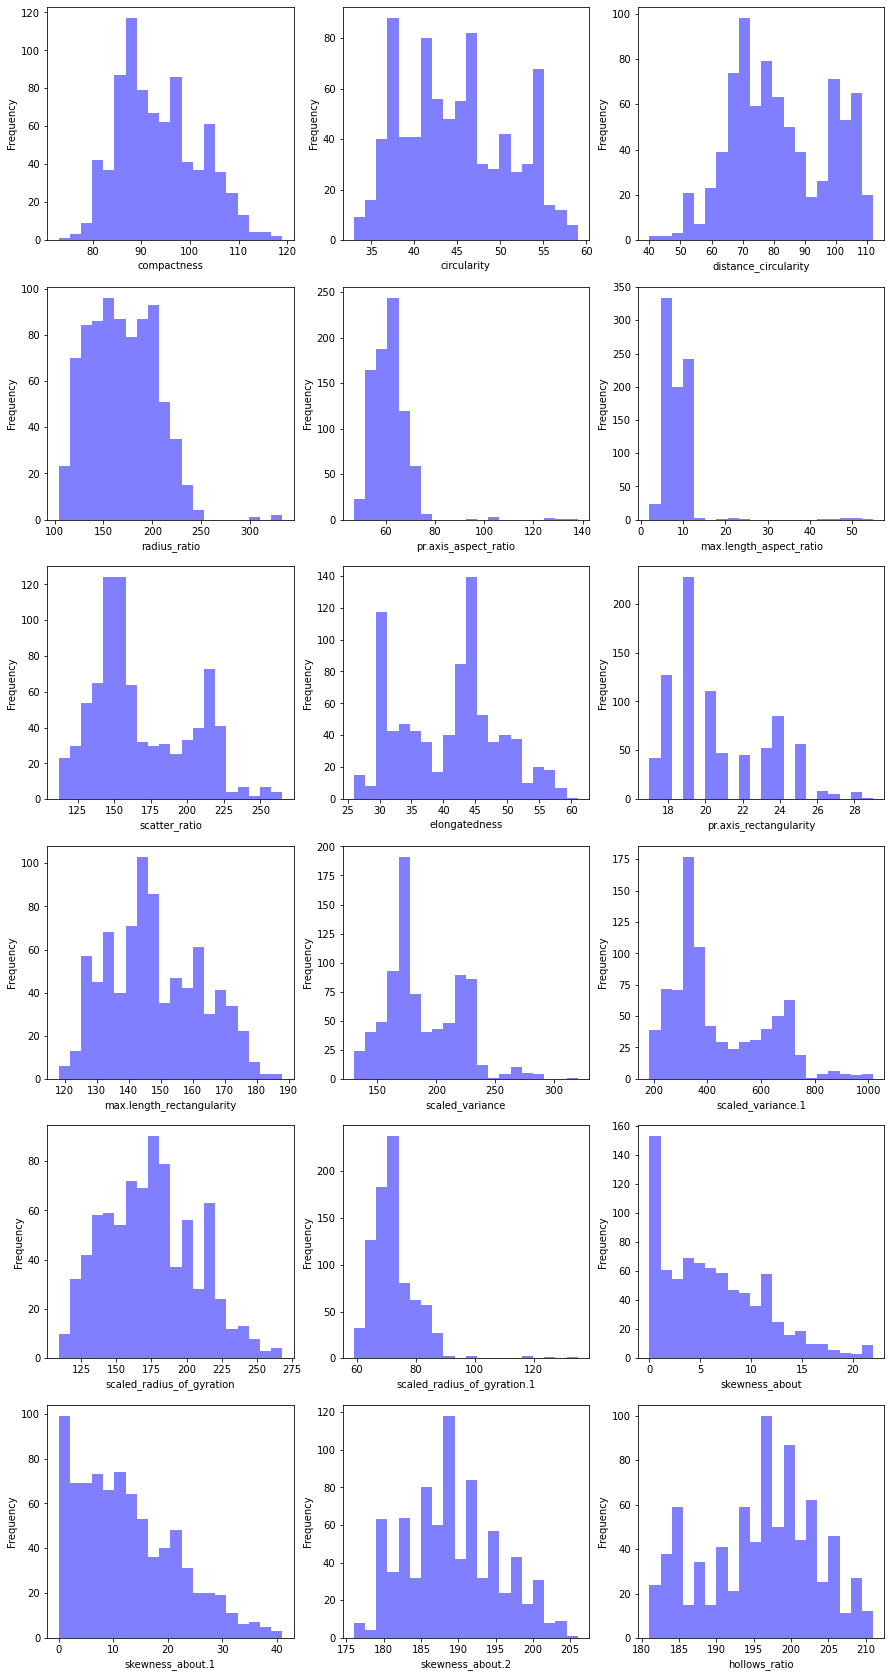

In [28]:
# Generically define how many plots along and across
ncols = 3
nrows = 6
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# Lazy counter so we can remove unwanted axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(data31.columns):

            ax.hist(data31[data31.columns[counter]], bins=20, color='blue', alpha=0.5,
            label='{}'.format(data31.columns[counter]))
            ax.set_xlabel(data31.columns[counter])
            ax.set_ylabel('Frequency')
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

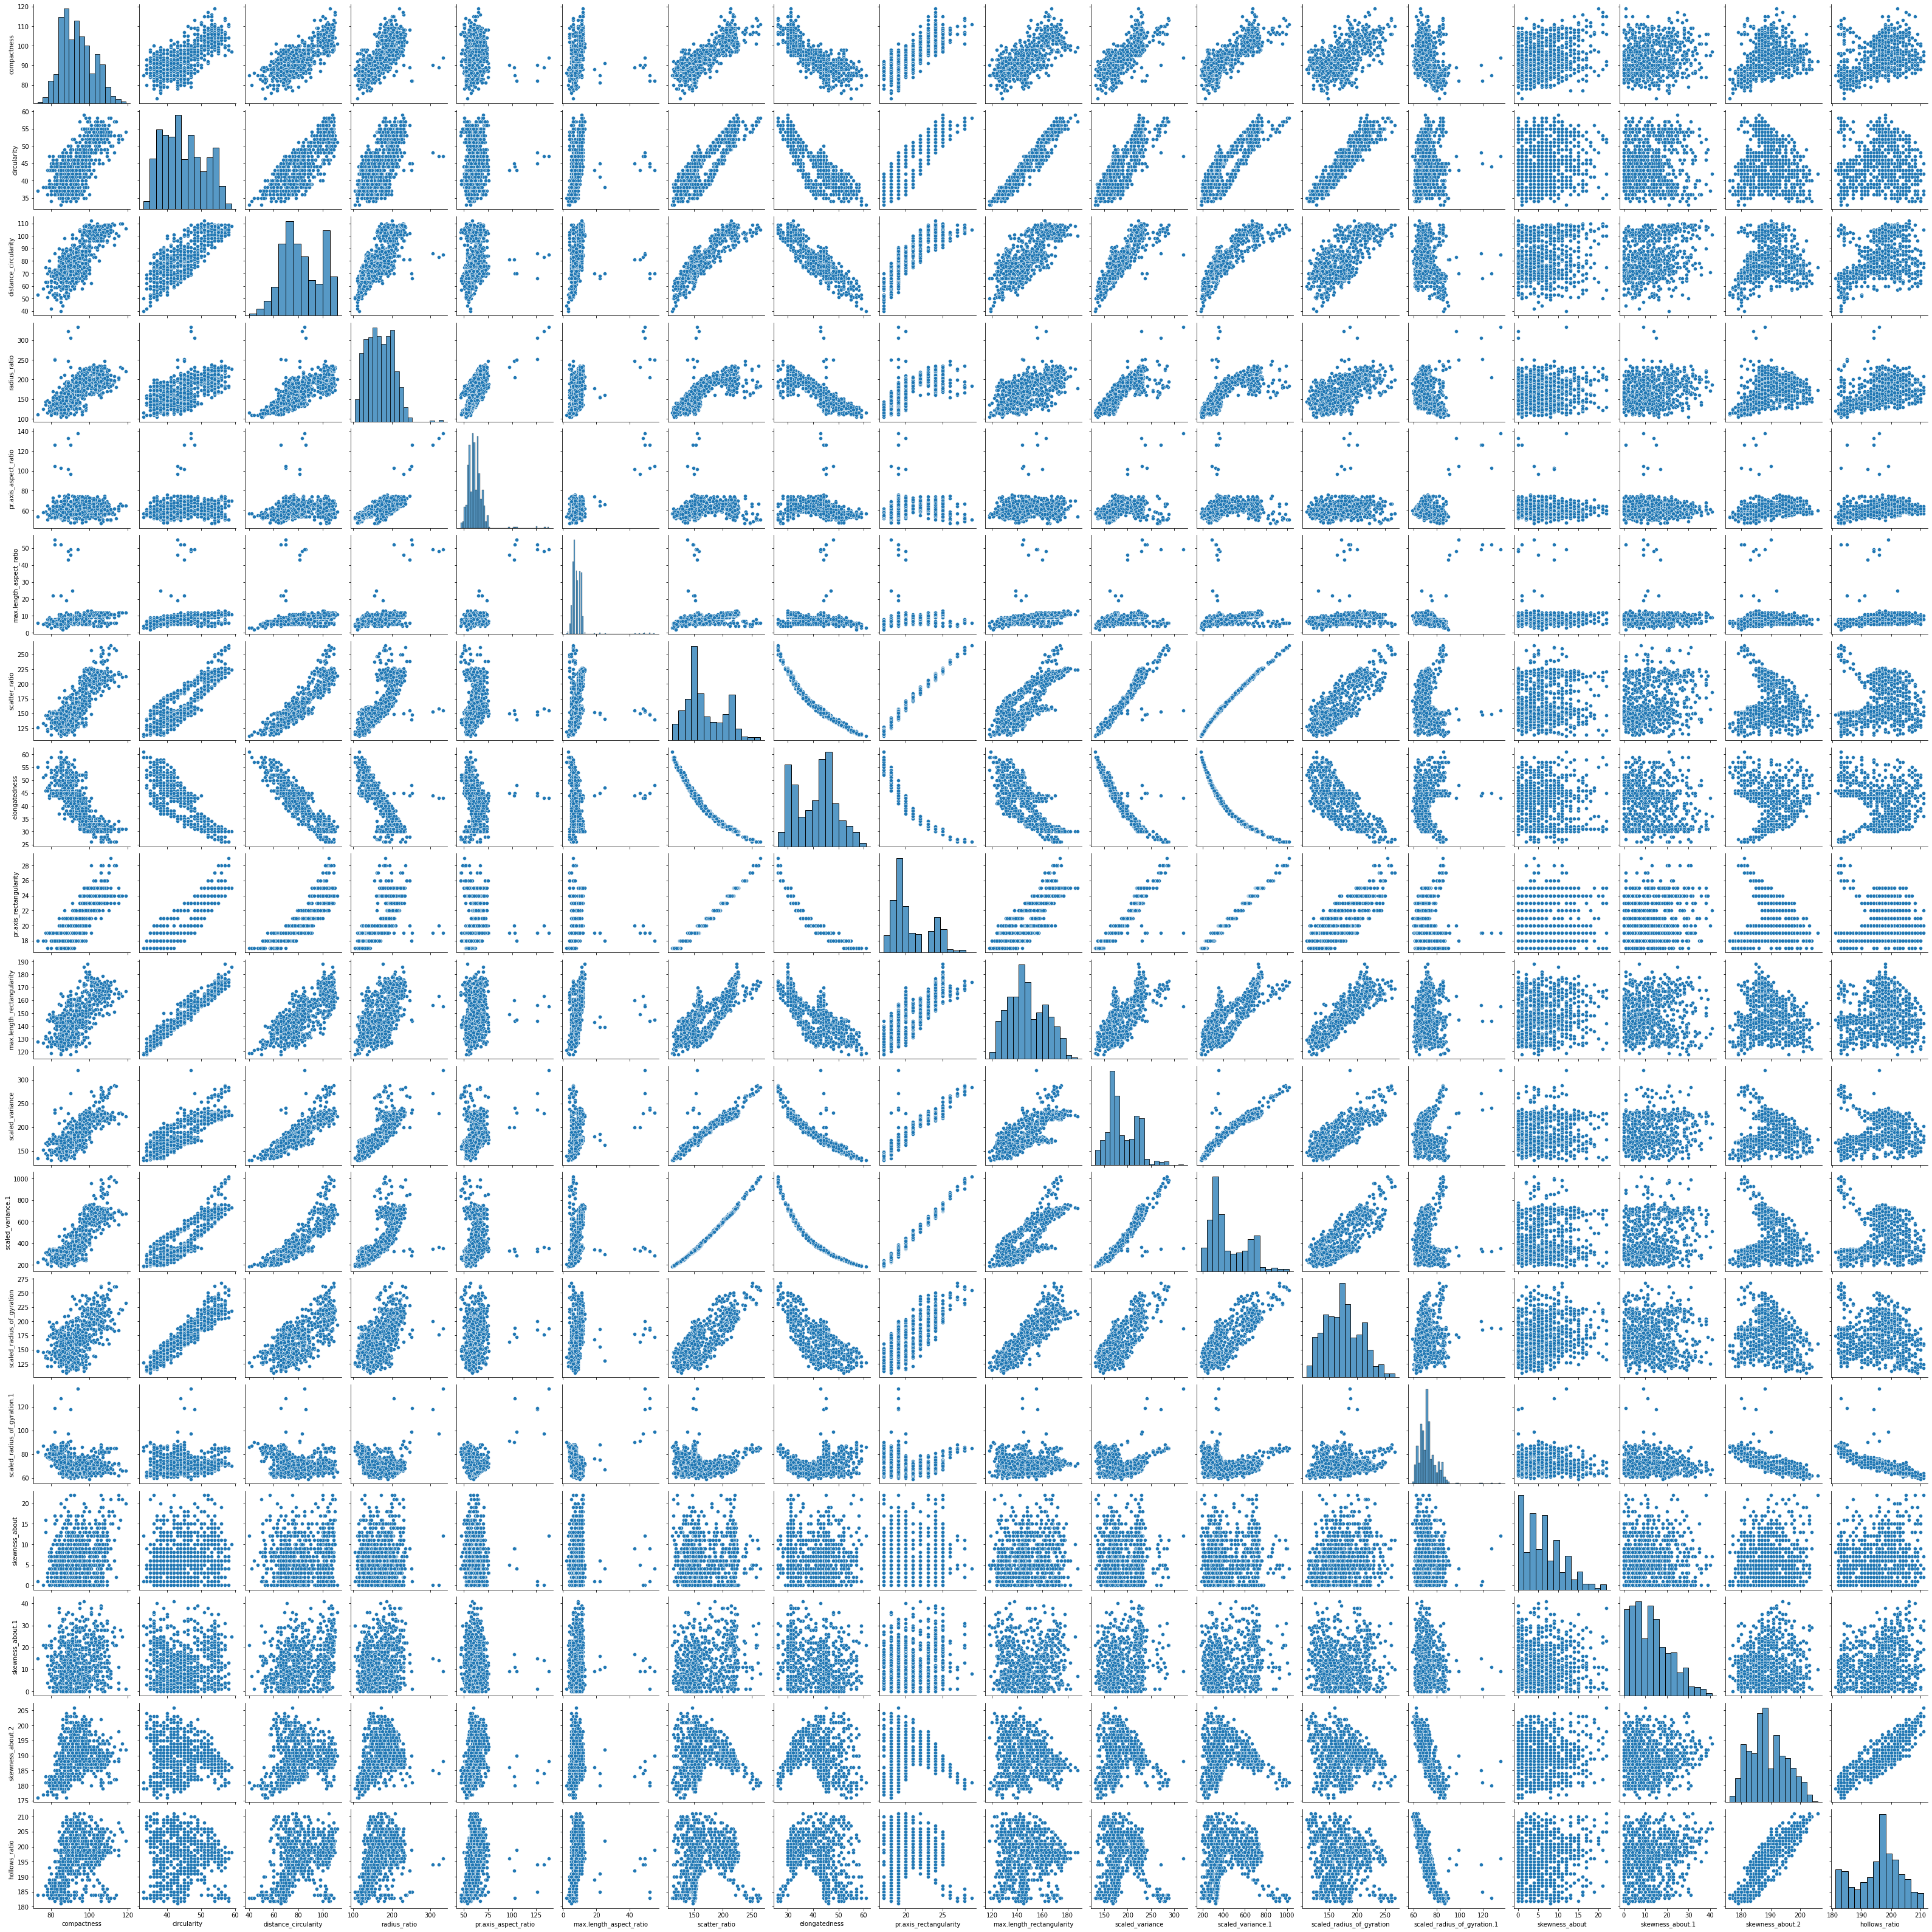

In [29]:
sns.pairplot(data31)

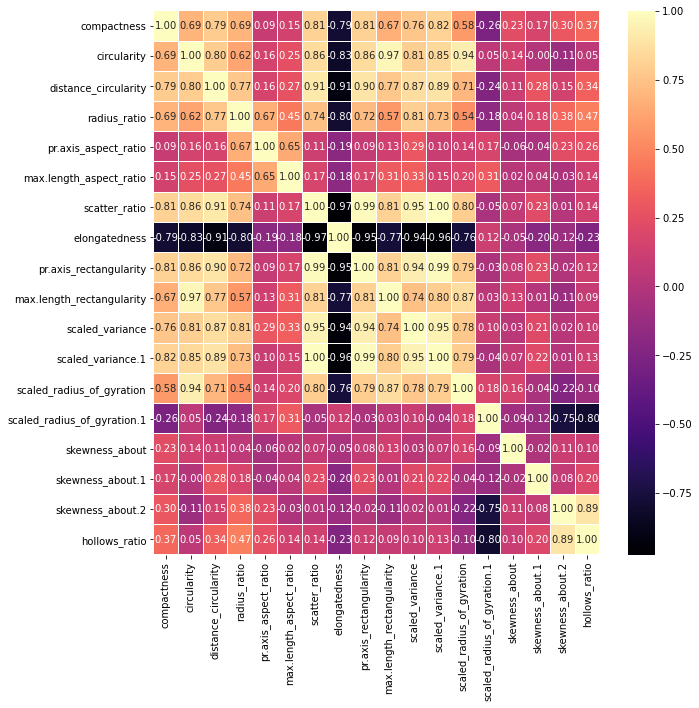

In [30]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data31.corr(), ax = ax, annot = True, linewidth = 0.05, fmt = '0.2f', cmap = 'magma') # color intensity
plt.show()

In [31]:
X = data31
y = data3["class"]  

In [32]:
mean3 = X.mean()
std3 = X.std()
X = (X - mean3)/std3

In [33]:
from sklearn.svm import SVC
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2, stratify = y, random_state=3)
svc = SVC()
svc.fit(X_train, y_train)
y_pred3 = svc.predict(X_test)
score = accuracy_score(y_pred3, y_test)
print(score)

0.950920245398773


In [34]:
pca = PCA(n_components = 9)
pca.fit(X)

PCA(n_components=9)

In [35]:
print(pca.explained_variance_)

[9.44175922 2.98594161 1.91532843 1.1686777  0.92795172 0.53151652
 0.3586321  0.22208732 0.15590115]


In [36]:
print(pca.explained_variance_ratio_)

[0.52454218 0.16588564 0.10640714 0.06492654 0.05155287 0.0295287
 0.01992401 0.01233818 0.00866117]


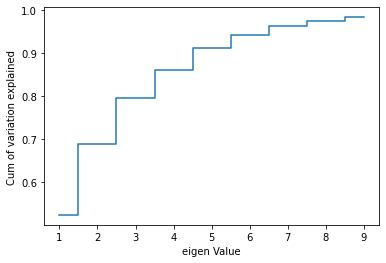

In [37]:
plt.step(list(range(1,10)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [38]:
Xpca = pca.transform(X)

In [39]:
X_train, X_test, y_train, y_test = ms.train_test_split(Xpca, y, test_size = 0.2, stratify = y, random_state=3)
svc1 = SVC()
svc1.fit(X_train, y_train)
y_pred31 = svc1.predict(X_test)
score = accuracy_score(y_pred31, y_test)
print(score)

0.9386503067484663


# Conclusion
Thus we reduced dimensionality of the dataset to about half(from 18 to 9), without significantly affecting accuracy(2%). 

# Part 4

In [40]:
data4 = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")
state = 1

In [41]:
data4 = data4.dropna(how = "any")
if state == 1:
    data4 = data4.drop("Name", axis = "columns")
    state = 0

In [42]:
data4

Runs    Ave      SR  Fours  Sixes   HF
1    733.0  61.08  160.74   46.0   59.0  9.0
3    590.0  36.87  143.55   64.0   17.0  6.0
5    495.0  33.00  161.23   57.0   19.0  5.0
7    479.0  43.54  149.68   41.0   20.0  5.0
9    569.0  40.64  129.61   58.0   18.0  5.0
..     ...    ...     ...    ...    ...  ...
171   12.0   6.00   70.58    1.0    0.0  0.0
173   19.0   4.75   70.37    2.0    0.0  0.0
175   30.0   5.00   58.82    4.0    0.0  0.0
177    6.0   3.00   50.00    0.0    0.0  0.0
179    2.0   0.50   18.18    0.0    0.0  0.0

[90 rows x 6 columns]

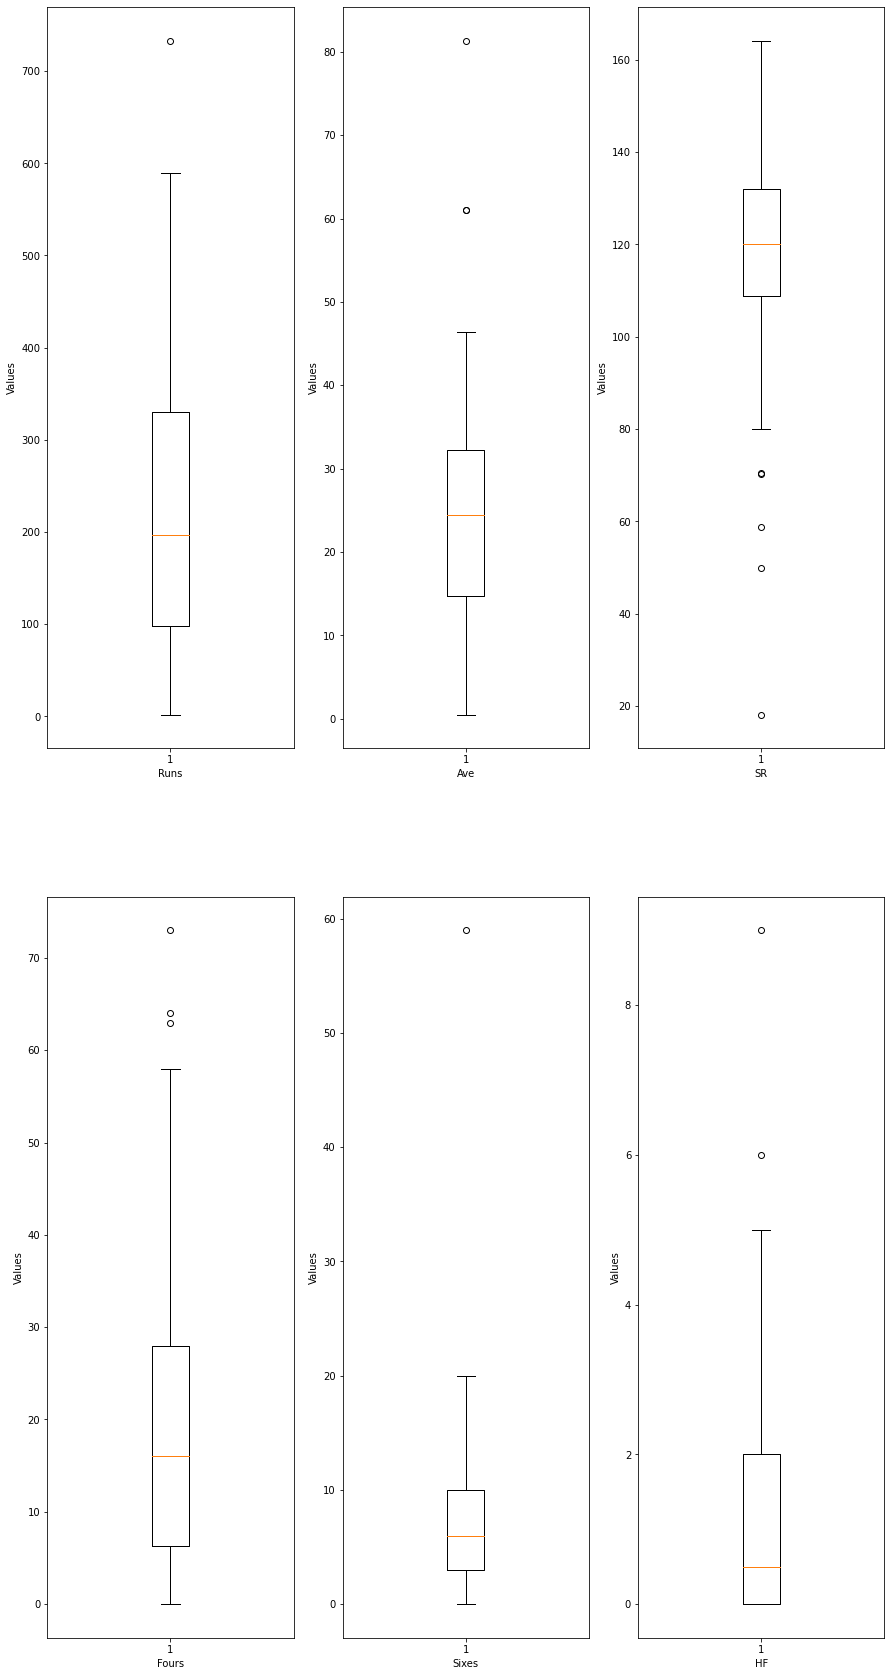

In [43]:
# Generically define how many plots along and across
ncols = 3
nrows = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# Lazy counter so we can remove unwanted axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(data4.columns):

            ax.boxplot(x = data4[data4.columns[counter]])
            ax.set_xlabel(data4.columns[counter])
            ax.set_ylabel('Values')
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

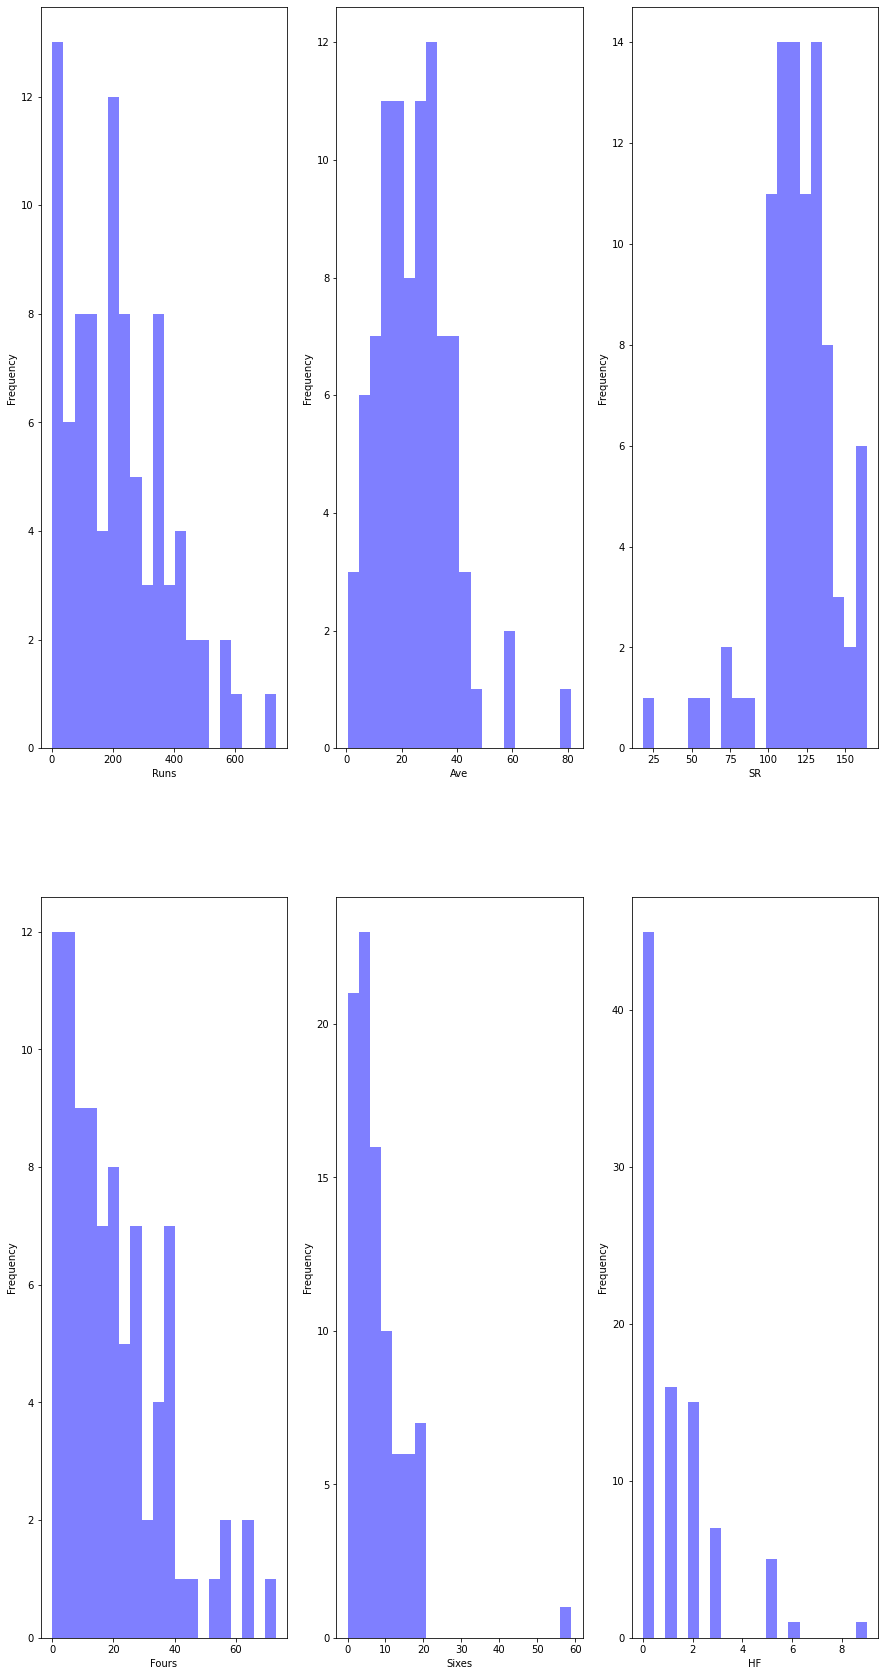

In [44]:
# Generically define how many plots along and across
ncols = 3
nrows = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# Lazy counter so we can remove unwanted axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(data4.columns):

            ax.hist(data4[data4.columns[counter]], bins=20, color='blue', alpha=0.5,
            label='{}'.format(data4.columns[counter]))
            ax.set_xlabel(data4.columns[counter])
            ax.set_ylabel('Frequency')
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

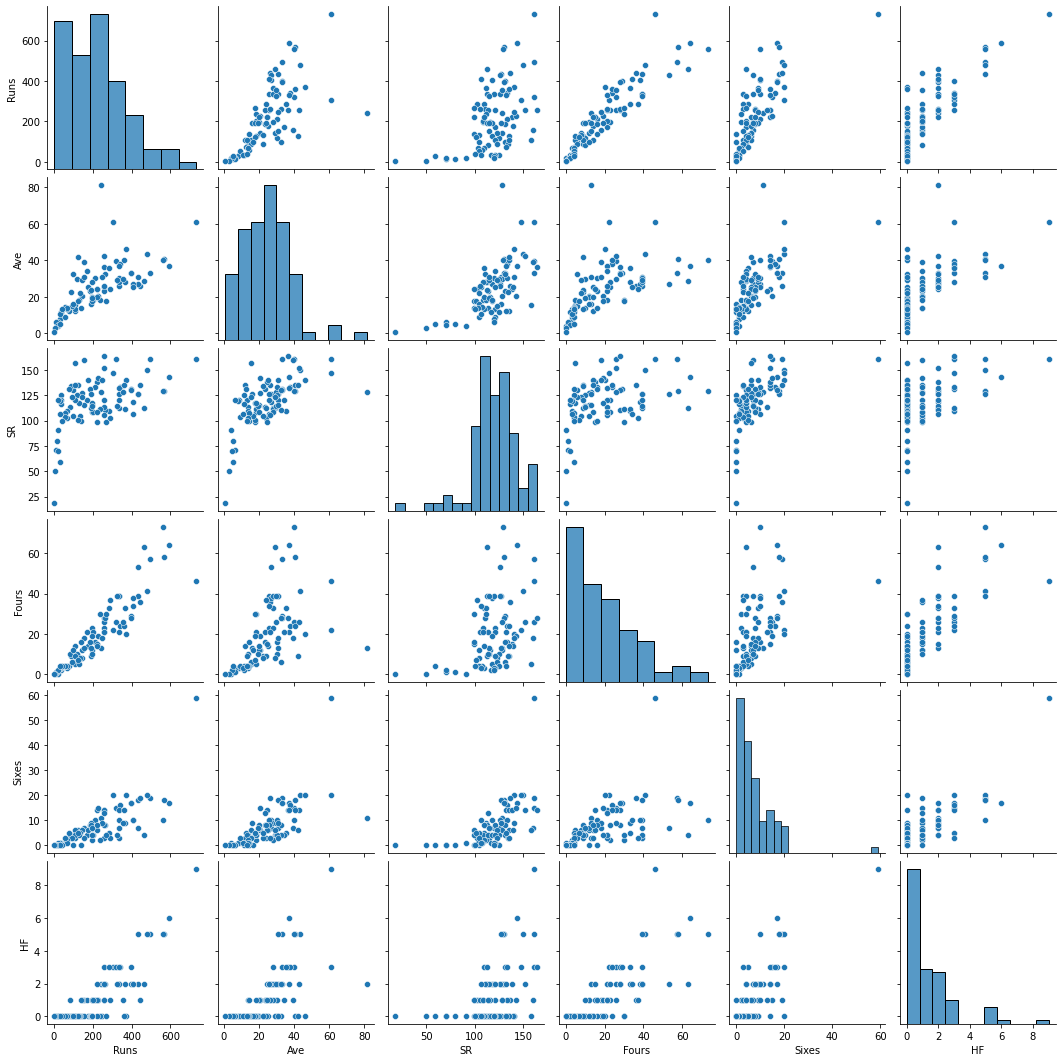

In [45]:
sns.pairplot(data4)

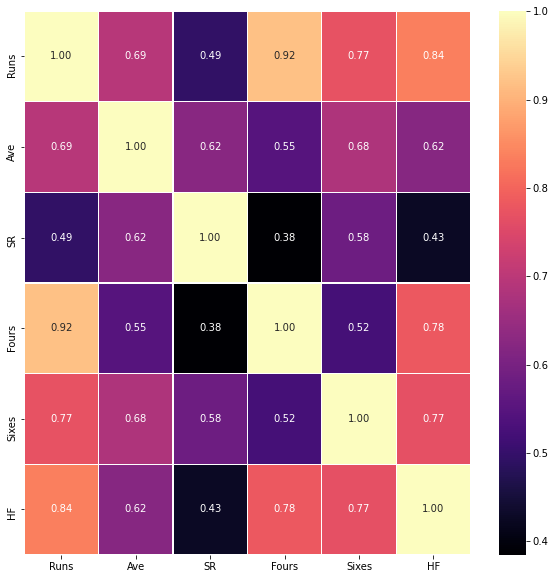

In [46]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data4.corr(), ax = ax, annot = True, linewidth = 0.05, fmt = '0.2f', cmap = 'magma') # color intensity
plt.show()

In [47]:
mean4 = data4.mean()
std4 = data4.std()
data41 = (data4 - mean4)/std4

In [48]:
pca4 = PCA(n_components = 6)
pca4.fit(data41)

PCA(n_components=6)

In [49]:
factors = pca4.explained_variance_

In [51]:
Xpca4 = pca4.transform(data41)

In [52]:
data41["score"] = np.matmul(Xpca4,factors.T)

In [53]:
data4["rank"] = data41["score"].rank()

In [54]:
data4["rank"]

1      90.0
3      89.0
5      86.0
7      85.0
9      88.0
       ... 
171     3.0
173     4.0
175     6.0
177     2.0
179     1.0
Name: rank, Length: 90, dtype: float64


# Part 5

6 of the dimensionality reduction techniques implementable in python are as follows:<br>
1. PCA
2. Singular Value Decomposition
3. Linear Discriminant Analysis
4. Isomap Embedding
5. Locally Linear Embedding
6. Modified Locally Linear Embedding